# Chapter 05 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

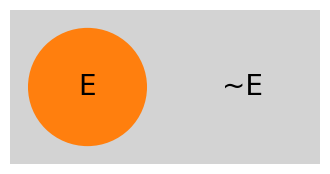

In [3]:
from matplotlib.patches import Circle, Rectangle
fig, ax = plt.subplots(figsize=(4, 2))
ax.add_patch(Rectangle((0, 0), width=4, height=2, color='lightgrey'))
ax.add_patch(Circle((1, 1), radius=0.75, color='C1', fill='C2', lw=2))
ax.text(1, 1, 'E', ha='center', va='center', fontsize=20)
ax.text(3, 1, '~E', ha='center', va='center', fontsize=20)
ax.set_xlim(0, 4)
ax.set_ylim(0, 2)
ax.axis('off')
plt.show()

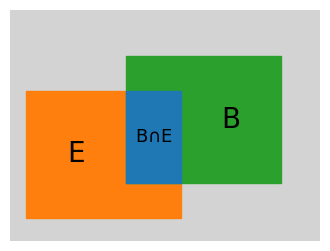

In [4]:
from matplotlib.patches import Rectangle
w, h = 4, 2
x1, x2, x3, x4 = 0.2, 1.5, 2.2, 3.5
y1, y2, y3, y4 = 0.2, 0.5, 1.3, 1.6
fig, ax = plt.subplots(figsize=(4, 3))
ax.add_patch(Rectangle((0, 0), width=w, height=h, color='lightgrey'))
ax.add_patch(Rectangle((x1, y1), width=(x3-x1), height=(y3-y1), color='C1'))
ax.text(0.5*(x1+x2), 0.5*(y1+y3), 'E', ha='center', va='center', fontsize=20)
ax.add_patch(Rectangle((x2, y2), width=(x4-x2), height=(y4-y2), color='C2'))
ax.text(0.5*(x3+x4), 0.5*(y2+y4), 'B', ha='center', va='center', fontsize=20)
ax.add_patch(Rectangle((x2, y2), width=(x3-x2), height=(y3-y2), color='C0'))
ax.text(0.5*(x2+x3), 0.5*(y2+y3), 'B$\cap$E', ha='center', va='center', fontsize=13)
ax.set_xlim(0, w)
ax.set_ylim(0, h)
ax.axis('off')
plt.show()

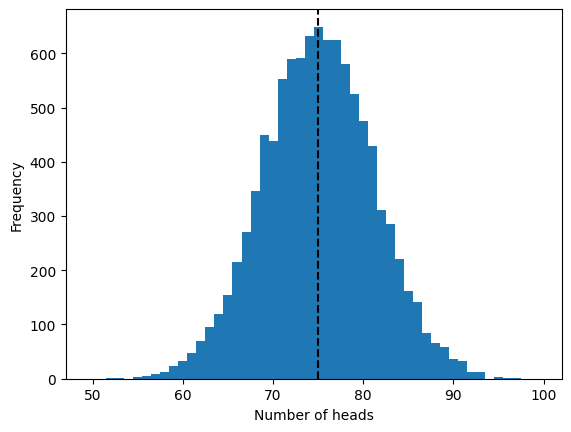

In [5]:
import random
import pandas as pd

random.seed(123)
nrepeat = 10_000
nr_heads = []
for _ in range(nrepeat):
    nr_head = random.choices(["H", "T"], k=150).count("H")
    nr_heads.append(nr_head)

ax = pd.Series(nr_heads).plot.hist(bins=np.arange(49.5, 100, 1))
ax.axvline(75, color='black', linestyle='--')
ax.set_xlabel("Number of heads")
plt.show()

# Binomial Formula

 Implement binomial formula

In [6]:
from scipy.special import comb
n = 5
p = 0.3
x = 3
prob = comb(n, x) * p**x * (1-p)**(n-x)
print(f"Probability of {x} successes in {n} trials with probability {p} of success: {prob:.3f}")

Probability of 3 successes in 5 trials with probability 0.3 of success: 0.132


 Use scipy to calculate probability

In [7]:
from scipy.stats import binom
prob = binom.pmf(x, n, p)
print(f"Probability of {x} successes in {n} trials with probability {p} of success: {prob:.3f}")

Probability of 3 successes in 5 trials with probability 0.3 of success: 0.132


 Use resampling to generate probabilities

In [8]:
random.seed(123)
box = [1] * 3 + [0] * 7
success_counts = np.array([0] * 6)
for _ in range(1000):
    success = sum(random.choices(box, k=5))
    success_counts[success] += 1
resample_prob = success_counts / 1000

 Cumulative probabilities

In [9]:
from scipy.stats import binom
n = 5
p = 0.3
df = pd.DataFrame({
    "successes": range(n+1),
    "probability": binom.pmf(range(n+1), n, p),
    "cum. prob.": binom.cdf(range(n+1), n, p),
    "inv. cum. prob.": binom.sf(range(n+1), n, p),
    "prob. resample": resample_prob,
})
print(df.round(3))

   successes  probability  cum. prob.  inv. cum. prob.  prob. resample
0          0        0.168       0.168            0.832           0.158
1          1        0.360       0.528            0.472           0.376
2          2        0.309       0.837            0.163           0.301
3          3        0.132       0.969            0.031           0.133
4          4        0.028       0.998            0.002           0.029
5          5        0.002       1.000            0.000           0.003


 Plot distribution

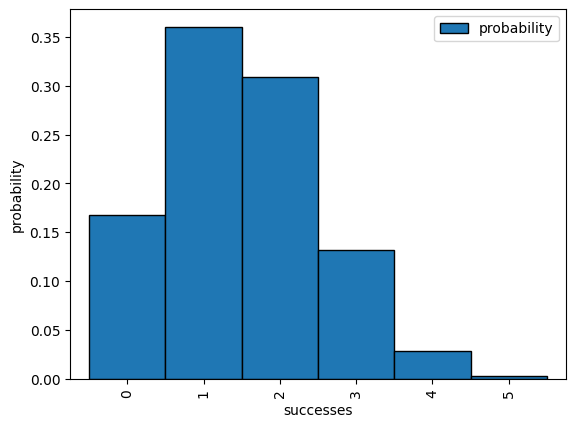

In [10]:
fig, ax = plt.subplots()
df.plot.bar(x="successes", y="probability", ax=ax, width=1, edgecolor="black")
ax.set_xlabel("successes")
ax.set_ylabel("probability")
plt.show()

# Normal distribution $p > x$

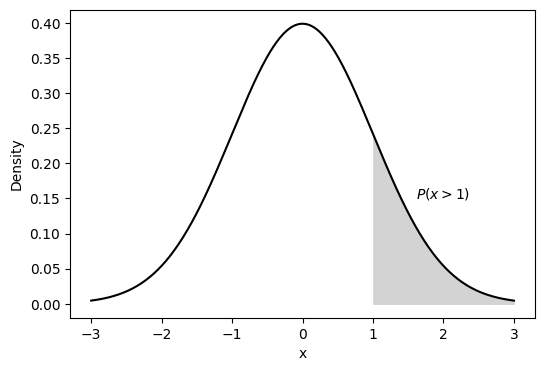

In [11]:
from scipy import stats

x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")

ax.fill_between(x[x>1], y[x>1], color="lightgrey")

ax.text(2, 0.15, "$P(x>1)$", horizontalalignment="center")

ax.set_xlabel("x")
ax.set_ylabel("Density")
plt.show()